Convolution Operations with Different Parameters
Task: Implement Convolution with Different Stride and Padding (10 points)
Write a Python script using NumPy and TensorFlow/Keras to perform convolution on a 5×5 input matrix using a 3×3 kernel with varying parameters.
1.	Define the following 5×5 input matrix:
2.	Define the following 3×3 kernel:
3.	Perform convolution operations with:
	# Stride = 1, Padding = ‘VALID’
  # Stride = 1, Padding = ‘SAME’
  #	Stride = 2, Padding = ‘VALID’
  #	Stride = 2, Padding = ‘SAME’
4.	Print the output feature maps for each case.


In [1]:
import numpy as np
import tensorflow as tf

# Define 5x5 input
input_matrix = np.array([
    [1,  2,  3,  4,  5],
    [6,  7,  8,  9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20],
    [21, 22, 23, 24, 25]
], dtype=np.float32)

# Define 3x3 kernel
kernel = np.array([
    [0,  1, 0],
    [1, -4, 1],
    [0,  1, 0]
], dtype=np.float32)

# Reshape for TensorFlow: [batch, height, width, channels]
input_tf = input_matrix[np.newaxis, :, :, np.newaxis]
kernel_tf = kernel[:, :, np.newaxis, np.newaxis]

def run_conv(stride, padding):
    result = tf.nn.conv2d(
        input=input_tf,
        filters=kernel_tf,
        strides=[1, stride, stride, 1],
        padding=padding
    )
    return result.numpy().squeeze()

# Run all cases
out_1_valid = run_conv(1, 'VALID')
out_1_same = run_conv(1, 'SAME')
out_2_valid = run_conv(2, 'VALID')
out_2_same = run_conv(2, 'SAME')

# Print results
print("Stride = 1, Padding = 'VALID':\n", out_1_valid, "\n")
print("Stride = 1, Padding = 'SAME':\n", out_1_same, "\n")
print("Stride = 2, Padding = 'VALID':\n", out_2_valid, "\n")
print("Stride = 2, Padding = 'SAME':\n", out_2_same, "\n")


Stride = 1, Padding = 'VALID':
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] 

Stride = 1, Padding = 'SAME':
 [[  4.   3.   2.   1.  -6.]
 [ -5.   0.   0.   0. -11.]
 [-10.   0.   0.   0. -16.]
 [-15.   0.   0.   0. -21.]
 [-46. -27. -28. -29. -56.]] 

Stride = 2, Padding = 'VALID':
 [[0. 0.]
 [0. 0.]] 

Stride = 2, Padding = 'SAME':
 [[  4.   2.  -6.]
 [-10.   0. -16.]
 [-46. -28. -56.]] 



Question 2: CNN Feature Extraction with Filters and Pooling
Task 1: Implement Edge Detection Using Convolution (15 points)
Write a Python script using NumPy and OpenCV (cv2) to apply edge detection on an image using a Sobel filter.
•	Load a grayscale image (you can use any sample image).
•	Apply the Sobel filter for edge detection in the x-direction and y-direction.
•	Display the original image and the filtered images.
Use the following Sobel filters:

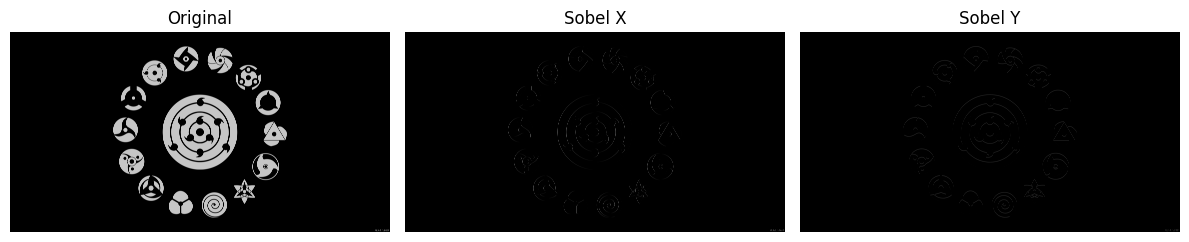

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load a grayscale image (change the path as needed)
img = cv2.imread('uchiha.jpg', cv2.IMREAD_GRAYSCALE)

# If img is None, use a sample image (fallback)
if img is None:
    img = np.tile(np.linspace(0, 255, 100, dtype=np.uint8), (100,1))

# Define Sobel X and Y filters (as given)
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

sobel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
], dtype=np.float32)

# Apply Sobel filters using cv2.filter2D
edge_x = cv2.filter2D(img, -1, sobel_x)
edge_y = cv2.filter2D(img, -1, sobel_y)

# Display results
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Sobel X')
plt.imshow(edge_x, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Sobel Y')
plt.imshow(edge_y, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


Task 2: Implement Max Pooling and Average Pooling (15 points)
Write a Python script using TensorFlow/Keras to demonstrate Max Pooling and Average Pooling.
•	Create a random 4x4 matrix as an input image.
•	Apply a 2x2 Max Pooling operation.
•	Apply a 2x2 Average Pooling operation.
•	Print the original matrix, max-pooled matrix, and average-pooled matrix.
Expected Output
Task1: Edge Detection using Sobel Filter
•	Display three images:
1.	Original Image
2.	Edge detection using Sobel-X
3.	Edge detection using Sobel-Y
Task2: Pooling Operations on Random 4×4 Matrix
•	Printed original matrix, max pooled matrix, and average pooled matrix.


In [3]:
import tensorflow as tf
import numpy as np

# Create a random 4x4 matrix with float32 dtype
input_matrix = np.random.randint(0, 10, (1, 4, 4, 1)).astype(np.float32) # Add .astype(np.float32) to cast to float32

# Max Pooling 2x2
max_pooled = tf.nn.max_pool2d(input_matrix, ksize=2, strides=2, padding='VALID')

# Average Pooling 2x2
avg_pooled = tf.nn.avg_pool2d(input_matrix, ksize=2, strides=2, padding='VALID')

print("Original matrix:\n", input_matrix[0, :, :, 0], "\n")
print("Max pooled matrix:\n", max_pooled.numpy()[0, :, :, 0], "\n")
print("Average pooled matrix:\n", avg_pooled.numpy()[0, :, :, 0], "\n")

Original matrix:
 [[9. 7. 2. 3.]
 [3. 3. 2. 9.]
 [9. 3. 7. 3.]
 [5. 1. 0. 5.]] 

Max pooled matrix:
 [[9. 9.]
 [9. 7.]] 

Average pooled matrix:
 [[5.5  4.  ]
 [4.5  3.75]] 



1. Load the Iris Dataset

In [4]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target


2. Min-Max Normalization

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_minmax = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
print("Min-Max Normalized Data (first 5 rows):\n", X_minmax.head())


Min-Max Normalized Data (first 5 rows):
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.222222          0.625000           0.067797          0.041667
1           0.166667          0.416667           0.067797          0.041667
2           0.111111          0.500000           0.050847          0.041667
3           0.083333          0.458333           0.084746          0.041667
4           0.194444          0.666667           0.067797          0.041667


Z-score Standardization and Visualization

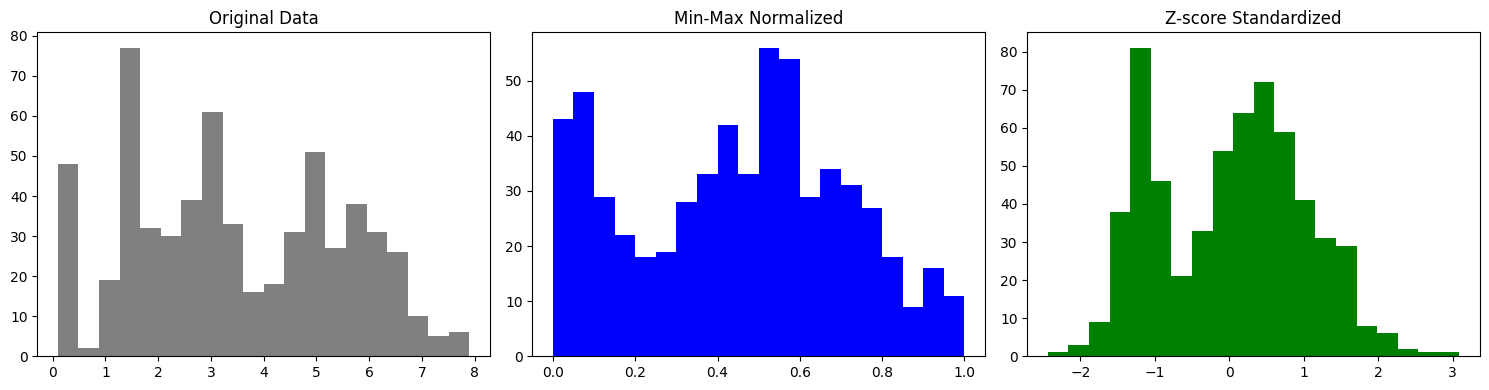

In [6]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Z-score Standardization
scaler_std = StandardScaler()
X_std = pd.DataFrame(scaler_std.fit_transform(X), columns=X.columns)

# Visualize distributions
fig, axs = plt.subplots(1, 3, figsize=(15,4))
axs[0].hist(X.values.ravel(), bins=20, color='grey')
axs[0].set_title('Original Data')

axs[1].hist(X_minmax.values.ravel(), bins=20, color='blue')
axs[1].set_title('Min-Max Normalized')

axs[2].hist(X_std.values.ravel(), bins=20, color='green')
axs[2].set_title('Z-score Standardized')
plt.tight_layout()
plt.show()


4. Train Logistic Regression Before & After Preprocessing

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def run_lr(X_data, y, note=''):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.3, random_state=42)
    clf = LogisticRegression(max_iter=200)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Logistic Regression Accuracy {note}: {acc:.4f}")

# Original
run_lr(X, y, '(Original Data)')

# Min-Max Normalized
run_lr(X_minmax, y, '(Min-Max Normalized)')

# Z-score Standardized
run_lr(X_std, y, '(Z-score Standardized)')


Logistic Regression Accuracy (Original Data): 1.0000
Logistic Regression Accuracy (Min-Max Normalized): 0.9111
Logistic Regression Accuracy (Z-score Standardized): 1.0000
